# Бинарный поиск, сортировка слиянием. Домашнее задание.

1. (1 балл) Написать бинарный поиск, принимающий на вход массив без повторяющихся элементов (проверять не надо) и искомый элемент. Построить график зависимости среднего времени работы от длины списка. 

In [1]:
import numpy as np
import time
import random
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.setrecursionlimit = 10**3 #in case you use bigger test set 

def collect_time_stats(function_to_decorate):
    test = [list(range(n)) for n in range(10, 10000, 1000)] + [list(range(n)) for n in range(10000, 100000, 10000)]
    lengthes = []
    avg_times = []
    def wrapper():
        for x in test:
            all_times = []
            for elm in range(len(x) + 1):
                start = time.time()
                function_to_decorate(x, elm)
                end = time.time()
                all_times.append(end-start)
            lengthes.append(len(x))
            avg_times.append(np.mean(all_times))
        return lengthes, avg_times
    return wrapper

@collect_time_stats 
def bin_search(x, elm, l, r): 

    mid = (l + r)//2
    
    if r - l == 0: 
        return -1
 
    if x[mid] == elm: 
        return mid 
         
    if x[mid] > elm: 
        return bin_search(x, elm, l, mid-1) 
 
    if x[mid] < elm: 
        return bin_search(x, elm, mid+1, r)

In [1]:
def bin_surch(x, elm, start, end):
    mid = (start + end)//2
    print(mid)
    if end - start == 0:
        return -1
    mid_elm = x[mid]
    if mid_elm == elm:
        return mid
    if mid_elm < elm:
        bin_surch(x, elm, mid+1, end)
    else:
        bin_surch(x, elm, start, mid)
    
a = [i for i in range(1,15)]
print(a)
print(bin_surch(a, 5, 1, 15))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
8
4
None


In [2]:
@collect_time_stats
def BinSearch(li, x):
    i = 0
    j = len(li)-1
    m = int(j/2)
    while li[m] != x and i < j:
        if x > li[m]:
            i = m+1
        else:
            j = m-1
        m = int((i+j)/2)
    if i > j:
        return -1
    else:
        return m

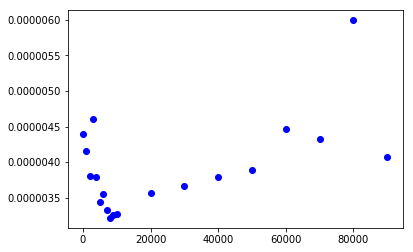

In [3]:
x, y = BinSearch()
plt.plot(x, y, "bo")
plt.show()

&nbsp;2. (1 балл) Написать наивный поиск на любом языке программирования. Построить на одном графике зависимости среднего времени работы от длины списка для наивного и бинарного поиска. Опять-таки, в списке нет повторяющихся элементов. 

Просто по порядку

In [4]:
@collect_time_stats
def naive_search(x, elm):
    for i in range(len(x)):
        if x[i] == elm:
            return i 

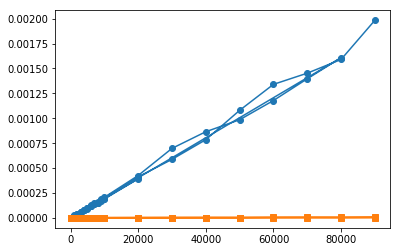

In [31]:
x, y = naive_search()
plt.plot(x, y, marker='o')
a, b = BinSearch()
plt.plot(a, b, marker='s')
plt.show()

&nbsp;3. (1 балл) Написать программу извлечения корня из 2 с заданной точностью с помощью бинарного поиска. 

Зажать и сравнить пока точности хватит

In [3]:
def SqrtSearch(num, per, l, r):

    mid = (l + r)/2
    #print(mid, l, r)
    
    if len(str(mid)) >= per: 
        return mid
 
    if num == float(mid*mid):
        return mid 
         
    if num > float(mid*mid): 
        return SqrtSearch(num, per, mid-1, r) 
 
    if num < float(mid*mid): 
        return SqrtSearch(num, per, l, mid+1) 
    
    
num = float(10)
per = 18
l = 0
r = max(1, num)
#print(l, r)
print(SqrtSearch(num, per, l, r))

import math
print(math.sqrt(num))

3.1622772216796875
3.1622776601683795


&nbsp;4. (2 балла) Для отсортированного списка с повторяющимися (!) элементами написать бинарный поиск, выдающий самое первое вхождение искомого элемента. Например, если в списке [1, 2, 3, 3, 3, 6, 8] ищем 3 - правильный ответ 2.

нужно изменить  mid 

In [1]:
def bin_search(x, elm, l, r): 
    if elm not in x:
        return -1

    mid = (l + r)//2
    #print(l, mid, r)
    
    if r - l == 0: 
        return mid
 
    if x[mid] == elm:
        if x[mid-1] == elm:
            return bin_search(x, elm, l, mid-1)
        else:
            return mid 
         
    if x[mid] > elm: 
        return bin_search(x, elm, l, mid-1) 
 
    if x[mid] < elm: 
        return bin_search(x, elm, mid+1, r)

In [3]:
x = [1, 2, 3, 3, 3, 6, 6, 6, 6, 8, 10, 10, 10]
print(bin_search(x, 2.5, 0, len(x)-1))

-1


&nbsp;5. (2 балла) Написать merge sort. Продемонстрировать график зависимости среднего времени работы от длины списка. Подсказка: случайные списки можно генерировать при помощи numpy.random.choice().

def mergeSort(alist):
    print("Splitting ",alist)
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
    print("Merging ",alist)

alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)
print(alist)


In [34]:
def merge_sort(x):
    l = len(x)
    if l <= 1:
        return x
    mid = l//2
    p1 = merge_sort(x[:mid])
    p2 = merge_sort(x[mid:])
    
    new = []
    while len(p1)*len(p2) > 0:
        if p1[0] > p2[0]:
            new.append(p2.pop(0))
        else:
            new.append(p1.pop(0))
    new.extend(p1)
    new.extend(p2)
    return new
  
alist = [54,26,93,17,77,31,44,55,20,1000]
print(merge_sort(alist))
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93, 1000]
[54, 26, 93, 17, 77, 31, 44, 55, 20, 1000]


доп. 1. (1 балл) Написать бинарный поиск без рекурсии.

In [ ]:
@collect_time_stats
def BinSearch(li, x):
    i = 0
    j = len(li)-1
    m = int(j/2)
    while li[m] != x and i < j:
        if x > li[m]:
            i = m+1
        else:
            j = m-1
        m = int((i+j)/2)
    if i > j:
        return -1
    else:
        return m

доп. 2. (1 балл) Для списка с повторяющимися элементами написать бинарный поиск, выдающий весь диапазон, в котором находится искомое число.

In [4]:
def bin_search_for_range(x, elm, l, r):
    if elm not in x:
        return -1

    mid = (l + r)//2
    #print(l, mid, r)
    
    if r - l == 0: 
        return mid
 
    if x[mid] == elm:
        k_r = 1
        k_l = 1
        i = True
        while i == True:
            if mid+k_r <= len(x)-1:
                if x[mid+k_r] == elm:
                    k_r += 1
                else:
                    i = False
            else:
                i = False
        j = True
        while j == True:
            if mid-k_l >= 0:
                if x[mid-k_l] == elm:
                    k_l += 1
                else:
                    j = False
            else:
                j = False
        return mid - k_l + 1, k_r + mid - 1             
 
         
    if x[mid] > elm: 
        return bin_search_for_range(x, elm, l, mid-1) 
 
    if x[mid] < elm: 
        return bin_search_for_range(x, elm, mid+1, r)

In [5]:
x = [1, 2, 3, 3, 3, 6, 6, 6, 6, 8, 10, 10, 10]
print(bin_search_for_range(x, -100, 0, len(x)-1))

-1


доп. 3. (1 балл) Напишите сортировку Шелла. Проверьте ее работу на ряде автоматически сгенерированных случайных примеров.

In [4]:
import numpy as np
import time
import random
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.setrecursionlimit = 10**3 #in case you use bigger test set 

def collect_time_stats_shell_sort(function_to_decorate):
    test = [list(np.random.choice(n, n, replace=False)) for n in range(10, 10000, 1000)] + [list(np.random.choice(n, n, replace=False)) for n in range(10000, 100000, 10000)]
    lengthes = []
    avg_times = []
    def wrapper():
        for x in test:
            all_times = []
            start = time.time()
            function_to_decorate(x)
            end = time.time()
            all_times.append(end-start)
            lengthes.append(len(x))
            avg_times.append(np.mean(all_times))
        return lengthes, avg_times
    return wrapper

In [5]:
@collect_time_stats_shell_sort
def shellSort(alist):
    inkrement = len(alist)//2
    #print(sublistcount)
    while inkrement > 0:
        
        for startposition in range(inkrement):
            alist = gapInsertionSort(alist,startposition,inkrement)

        inkrement = inkrement // 2
        #print(sublistcount)
    return alist

def gapInsertionSort(alist,start,gap):
    for i in range(start+gap,len(alist),gap):

        currentvalue = alist[i]
        position = i

        while position>=gap and alist[position-gap]>currentvalue:
            alist[position]=alist[position-gap]
            position = position-gap

        alist[position]=currentvalue
    return alist

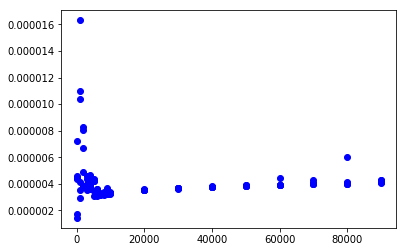

In [10]:
a, b = BinSearch()
plt.plot(a, b, 'bo')
plt.show()

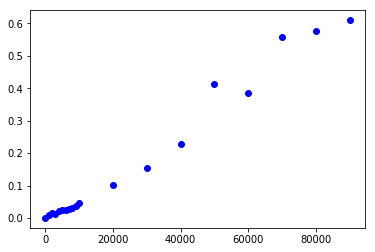

In [11]:
c, d = shellSort()
plt.plot(c, d, "bo")
plt.show()

ValueError: Illegal format string "po"; two marker symbols

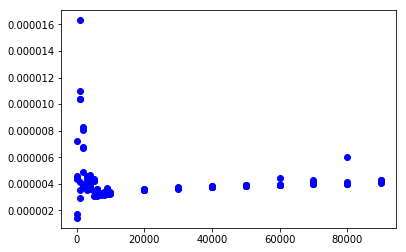

In [12]:
a, b = BinSearch()
plt.plot(a, b, "bo")
c, d = shellSort()
plt.plot(c, d, "po")
plt.show()

In [69]:
def shellSort(alist):
    inkrement = len(alist)//2
    #print(sublistcount)
    while inkrement > 0:
        
        for startposition in range(inkrement):
            alist = gapInsertionSort(alist,startposition,inkrement)

        inkrement = inkrement // 2
        #print(sublistcount)
    return alist

def gapInsertionSort(alist,start,gap):
    for i in range(start+gap,len(alist),gap):

        currentvalue = alist[i]
        position = i

        while position>=gap and alist[position-gap]>currentvalue:
            alist[position]=alist[position-gap]
            position = position-gap

        alist[position]=currentvalue
    return alist

In [70]:
import numpy as np
alist = np.random.choice(10, 10, replace=False)
print(alist)
print(shellSort(alist))

[5 3 2 4 9 8 0 1 7 6]
[0 1 2 3 4 5 6 7 8 9]
